# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: Lectures 2 and 3 

**Due date: Tuesday, May 24, 2022 at 18:00**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [ ]:
spotify_df = pd.read_csv("spotify.csv", index_col=0)
spotify_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [ ]:
df_train, df_test = train_test_split(spotify_df, test_size=0.25, random_state=123)
print(df_train.shape)
df_test.shape

(1512, 16)


(505, 16)

training: 1512
test: 505

#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [ ]:
train_desc = df_train.describe()
temp = train_desc.loc["max"]-train_desc.loc["min"]
temp.sort_values()

speechiness              0.792900
danceability             0.862000
liveness                 0.950200
valence                  0.956100
instrumentalness         0.976000
energy                   0.982200
acousticness             0.994995
mode                     1.000000
target                   1.000000
time_signature           4.000000
key                     11.000000
loudness                32.790000
tempo                  171.472000
duration_ms         833918.000000
dtype: float64

speechiness: 0.792900

#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

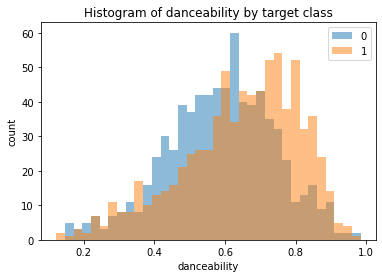

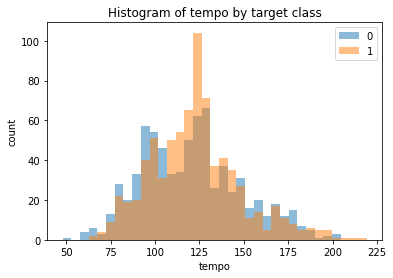

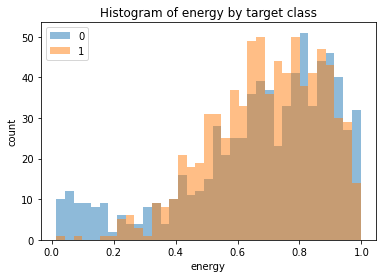

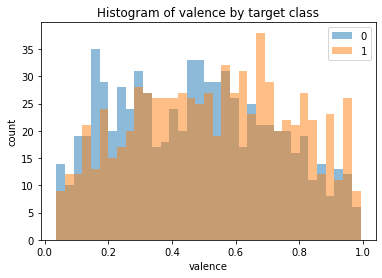

In [20]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")
arr = ['danceability', 'tempo','energy','valence']
for colname in arr:
    d = {'0': negative_examples[colname], '1':positive_examples[colname]}
    df = pd.DataFrame(d)
    name = "Histogram of " + colname + " by target class"
    df.plot.hist(bins=35, alpha=0.5, title=name)
    plt.xlabel(colname)
    plt.ylabel("count")
    plt.show()

#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

A reasonable split would be to predict 1 if danceability > 0.7 (and predict 0 otherwise)

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



Yes, because it means that for a particular feature value, there is an equal chance of being either 0 or 1 for the target class, effectively causes a 50/50 guess.



#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [94]:
df_train[["song_title", "artist"]].head()

,song_title,artist
1396,All in Vain,Mot
641,One of Those Nights,Juicy J
1765,Take Me As I Am,Wyclef Jean
1801,Save My Soul,JoJo
1624,Save the World - Radio Mix,Swedish House Mafia


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

I think both features may be useful in predicting the target. For example, song_title may be useful as titles with "Radio Mix" in the name indicate that the song is well liked enough to be played on the radio, and artist may be useful because bigger artists have a bigger following, and thus tend to have more well received music in general. There may be some difficulty as these features tend to have unpredictable values, for instance, a new artist may release their first song, and since the model has never read the artist's name before, it may produce unpredictable results.

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [167]:
X_train = df_train.drop(columns=['target','song_title','artist'])
y_train = df_train[['target']]
X_test = df_test.drop(columns=['target','song_title','artist'])
y_test = df_test[['target']]
dcf = DecisionTreeClassifier()
dcf.fit(X_train, y_train)

DecisionTreeClassifier()

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

In [168]:
dcf.predict(X_train.iloc[[0]]) == y_train.iloc[[0]]

,target
1396,True


yes, the model correctly predicted 0

#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [191]:
cross_val_score(dcf, X_train, y_train, cv=10).mean()


0.6759193098640641

#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [192]:
cv_df = cross_validate(dcf, X_train, y_train, cv=10, return_train_score=True)
cv_score = cv_df['test_score'].mean()
train_score = cv_df['train_score'].mean()
print("cross-validation score: " + str(cv_score) + "\ntraining score: " + str(train_score))

cross-validation score: 0.6852082607180202
training score: 0.9994121428880149


No it is not, because cross_val_score and cross_validate do not actually return a fitted model, so each time the function is called, the model is refitted, due to the variation in decision nodes, and the lack of hyperparameters, the learned models will be slightly different each time, resulting in different accuracies

#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

There is a significant difference between the training score and the cross-validation score, with a difference of 0.324, and with unreasonably high test accuracy. I believe this is because of the unlimited depth of the decision trees, resulting in extremely specific and possible irrelevant decision criteria.

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

In [178]:
cross_validate(dcf, X_train, y_train, cv=10, return_train_score=True)

{'fit_time': array([0.01796794, 0.01603627, 0.01542878, 0.01521206, 0.01550007,
        0.01518393, 0.0167048 , 0.02067733, 0.01477885, 0.01247501]),
 'score_time': array([0.00183702, 0.00225306, 0.00159526, 0.00162005, 0.00169587,
        0.00177121, 0.00185227, 0.00299859, 0.00170803, 0.00136614]),
 'test_score': array([0.67105263, 0.65131579, 0.68211921, 0.66225166, 0.63576159,
        0.70860927, 0.66887417, 0.65562914, 0.69536424, 0.69536424]),
 'train_score': array([0.99926471, 1.        , 1.        , 0.99926525, 0.99926525,
        0.99926525, 0.99926525, 0.99926525, 0.99926525, 0.99926525])}

These sub-scores show that the model is overfitted to the test_df with some test scores even being 1, this reduces the trustworthiness of the cross validation score, as the model is built to accurately predict the test data, but not the entire distribution data as a whole, and may identify irrelevant or even harmful patterns.

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

   depth  mean_train_accuracy  mean_cv_accuracy
2      4              0.77021          0.718935


<AxesSubplot:title={'center':'Max depth vs. train and cv accuracies'}, xlabel='Max depth', ylabel='Accuracy'>

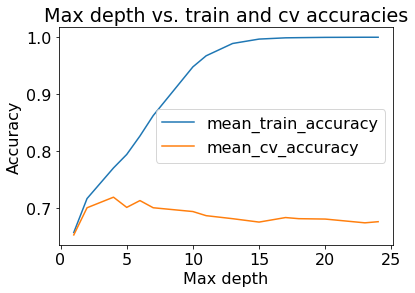

In [196]:
"Adapted from lecture 2"
results_dict = {
    "depth": [],
    "mean_train_accuracy": [],
    "mean_cv_accuracy":[],
}

np.random.seed(2)
param_grid = np.random.choice(range(25), 15, replace=False)+1
param_grid.sort()

for depth in param_grid:
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["mean_cv_accuracy"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_accuracy"].append(np.mean(scores["train_score"]))

results_df = pd.DataFrame(results_dict)
print(results_df.iloc[[2]])
results_df.plot.line(x='depth', y=['mean_train_accuracy','mean_cv_accuracy'], title="Max depth vs. train and cv accuracies",xlabel='Max depth', ylabel='Accuracy')

As max depth increases, the cv accuracy rises to a peak and then begins to decrease, however, the training accuracy continues to increase. This is because past a certain max depth, the model begins to overfit, and develop patterns specific to the testing data. From these results, I would pick 4 as the optimal max depth to generalize the dataset, as that is when the cv accuracy is the highest, and also when the difference between the two accuracies is the lowest. While it takes more research to understand what is an acceptable accuracy to generalize, I believe since our train accuracy and cv accuracy are close, and our max depth achieves the highest possible cv accuracy, the model would generalize to other spotify datasets.

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [157]:
dcf_final = DecisionTreeClassifier(max_depth=4)
dcf_final.fit(X_train, y_train)
final_score = dcf_final.score(X_test, y_test)
print("test_score: " +  str(final_score) +
      "\ncv_score: " + "0.7189351690484489")

test_score: 0.7029702970297029
cv_score: 0.7189351690484489


Overall, the test_score is quite close to the cv_score, which means that the model at max_depth 4 was not too overfitted or underfitted, and using the testing data as a proxy for deployment data, the model will predict unseen data with an accuracy of ~0.703.

## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

1. if first feature < 5.5, then -1, else +1 
2. (< 5.5: -1, -1 , +1, >5.5 = +1, +1, +1) accuracy = 5/6 = 0.833
3. no we cannot obtain 100% accuracy

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 